# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/dlcourse2018_students

Fall Semester 2018

# Zalando dataset

https://www.kaggle.com/zalando-research/fashionmnist/data

**Context**
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."
Zalando seeks to replace the original MNIST dataset

**Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. 
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

**Labels**
Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

**TL;DR**
Each row is a separate image 
Column 1 is the class label. 
Remaining columns are pixel numbers (784 total). 
Each value is the darkness of the pixel (1 to 255)

**Acknowledgements**
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist
Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

**License**
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [2]:
def get_label_name(idx):
    if (idx == 0):
        return '(0) T-shirt/top'
    elif (idx == 1):
        return '(1) Trouser'
    elif (idx == 2):
        return '(2) Pullover'
    elif (idx == 3):
        return '(3) Dress'
    elif (idx == 4):
        return '(4) Coat'
    elif (idx == 5):
        return '(5) Sandal'
    elif (idx == 6):
        return '(6) Shirt'
    elif (idx == 7):
        return '(7) Sneaker'
    elif (idx == 8):
        return '(8) Bag'
    elif (idx == 9):
        return '(9) Ankle boot'

In [3]:
def get_random_element_with_label (data, lbls, lbl):
    subset = data[lbls == lbl]
    return np.random.choice(subset)

# REMEMBER: unzip the zip files before running the next cell

In [4]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [5]:
len(data_train)

60000

In [6]:
data_train.shape

(60000, 785)

Let's test our function to get a random element from a subset

# Train dataset preparation

In [7]:
labels = data_train['label'].values.reshape(1, 60000)

labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()


train = data_train.drop('label', axis=1).transpose()

In [8]:
print(labels_.shape)
print(train.shape)

(10, 60000)
(784, 60000)


# Test dataset preparation

In [9]:
labels_test = data_test['label'].values.reshape(1, 10000)

labels_test_ = np.zeros((10000, 10))
labels_test_[np.arange(10000), labels_test] = 1
labels_test_ = labels_test_.transpose()


test = data_test.drop('label', axis=1).transpose()

In [10]:
labels_test_.shape

(10, 10000)

### Normalization of data

Let's normalize the training data dividing by 255.0 to get the values between 0 and 1.

In [11]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

### One example of the images

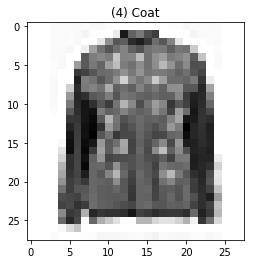

In [12]:
idx = 5
plt.imshow(train[:,idx].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.title(get_label_name(labels[:,idx]))
plt.show()

# Let's check some random sample of the data

THe following function will return one numpy array (one column) with an example of a choosen label.

In [13]:
def get_random_element_with_label (data, lbls, lbl):
    tmp = lbls == lbl
    subset = data[:,tmp.flatten()]
    return subset[:,randint(1,subset.shape[1])]

## Let's create an array with a column for each label (one-hot encoding)

The following code create a numpy array where in column 0 you will find an example of label 0, in column 1 of label 1 and so on.

In [14]:
labels_overview = np.empty([784,10])
for i in range (0,10):
    col = get_random_element_with_label(train, labels, i)
    labels_overview[:,i] = col

Now let's plot one example of each type (label)

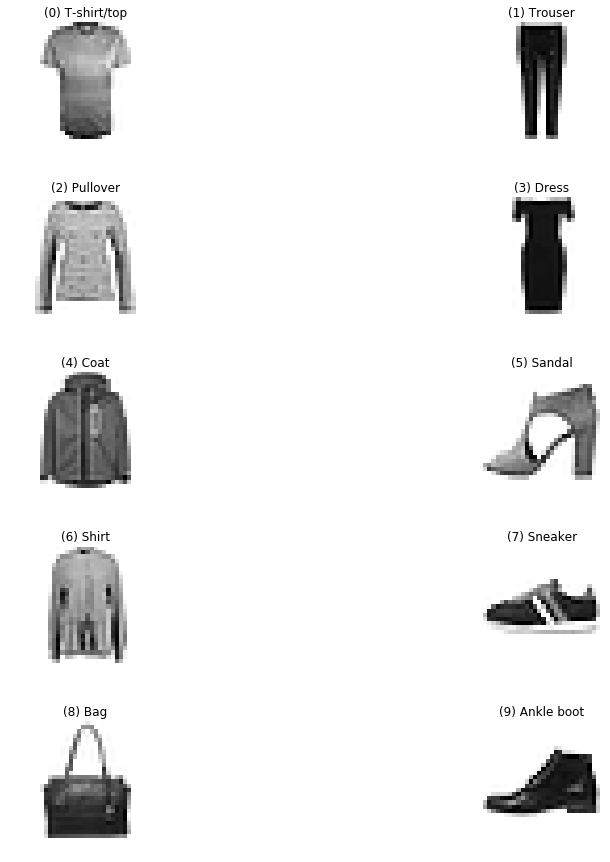

In [15]:
f = plt.figure(figsize=(15,15));
count = 1
for i in range(0,10):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# Network with 1 layer and 15 neurons - with consant learning rate $\gamma$

In [ ]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 15 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer 

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [ ]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
cost_history = []
for epoch in range(100+1):
    for i in range(0, train.shape[1], 50):
        X_train_mini = train[:,i:i + 50]
        y_train_mini = labels_[:,i:i + 50]

        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: 0.001})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate: 0.001})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 20 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

In [ ]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

In [ ]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

In [ ]:
sess.close()

# Network with 3 layers and 14 neurons in each layer, with Learning rate decay

In [ ]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 14 # Number of neurons in layer 1
n2 = 14 # Number of neurons in layer 2 
n3 = 14
n4 = 10
#n5 = 10 # Neurons for the softmax function

cost_history = np.empty(shape=[0], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

stddev_f = 0.1

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
Z4 = tf.matmul(W4, Z3) + b4
y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [20]:
train.shape[1]

60000

In [ ]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())

learning_r = 0.3
minibatch_size = 50
    
cost_history = []
for epoch in range(100+1):
    #print (epoch, ' ', learning_r)
    for i in range(0, train.shape[1], minibatch_size):
        X_train_mini = train[:,i:i + minibatch_size]
        y_train_mini = labels_[:,i:i + minibatch_size]

        #sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_})
    cost_history = np.append(cost_history, cost_)
    
    ##### YOUR CODE HERE
    
    if (epoch % 10 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

In [ ]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, 
                                   Y: labels_, learning_rate: 0.001}, session = sess))

In [ ]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

In [ ]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_historyL3, ls='-', color = 'black', 
        label = '3 layers, 14 neurons ($Q=11560$), Batch size = 30, \n$\gamma = step wise$')
ax.plot(cost_history15, ls='--', color = 'black', 
        label = '1 layer, 15 neurons ($Q=11935$), Batch size = 50, \n$\gamma = 0.05$')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,100))

In [ ]:
sess.close()

# Exercise 1: implement a network with $\gamma$ with inverse time decay by hand - difficulty hard/FUN

Implement the learning code decay adding code to the network with 3 layers. The matematical formula you want to implement is

$$
\gamma = \frac{\gamma_0}{1+\nu j}
$$

where $j$ is the number of iterations (**not epochs**).

**hint** you can use a code similar to this (this code is not tested and it serves only as guidelines)
    
    m = train.shape[1]
    number_of_batches = m / minibatch_size
    learning_r = initial_learning_rate / (1.0 + nu * (epoch * number_of_batches + i)) 

where ```i``` is the iteration done during the mini_batch feeding, and ```number_of_batches``` is the number of observations divided by the size of the mini batches. For examples if you have ```m = 60000``` and ```minibatch_size = 50``` then ```number_of_batches = 1200```.

Update the code part
    ##### YOUR CODE HERE
in the evaluation phase.

# Exercise 2: Implement a network with $\gamma$ inverse time decay with tensorflow - difficulty hard

Using the code above with 3 layers implement a network with exponential decay and see which parameters are working bext to help converging. Compare your result with the plain gradient descent version available at the beginning of the notebook.

To implement it you can use the call ```tf.train.inverse_time_decay ()``` and check its documentation at https://goo.gl/fiE2ML.

**hint** To implement it you can use the following code in the building phase of your network. Note that you need to create the optimizer code in a slightly different way.

    initial_learning_rate = 0.1
    decay_steps = 1000
    decay_rate = 0.1
    global_step = tf.Variable(0, trainable = False)
    learning_rate_decay = tf.train.inverse_time_decay(initial_learning_rate,
    global_step, decay_steps, decay_rate)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate_decay).
    minimize(cost, global_step = global_step)

In [18]:
n_dim = 784
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 14 # Number of neurons in layer 1
n2 = 14 # Number of neurons in layer 2 
n3 = 14
n4 = 10
#n5 = 10 # Neurons for the softmax function

cost_history = np.empty(shape=[0], dtype = float)

initial_learning_rate = 0.05
decay_steps = 1000
decay_rate = 0.1
global_step = tf.Variable(0, trainable = False)
learning_rate_decay = tf.train.inverse_time_decay(initial_learning_rate,
global_step, decay_steps, decay_rate)

# You don't need this line
# learning_rate = tf.placeholder(tf.float32, shape=())

stddev_f = 0.1

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
                 
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
Z4 = tf.matmul(W4, Z3) + b4
y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))


optimizer = tf.train.GradientDescentOptimizer(learning_rate_decay).minimize(cost, global_step = global_step)

# You don't need this line
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [20]:
%%time
sess = tf.Session()
sess.run(tf.global_variables_initializer())

minibatch_size = 50
    
cost_history = []
for epoch in range(100+1):
    for i in range(0, train.shape[1], minibatch_size):
        X_train_mini = train[:,i:i + minibatch_size]
        y_train_mini = labels_[:,i:i + minibatch_size]
        
        sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_})
    cost_history = np.append(cost_history, cost_)
        
    if (epoch % 20 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.32151172
Reached epoch 20 cost J = 0.107453845
Reached epoch 40 cost J = 0.08956155
Reached epoch 60 cost J = 0.083936505
Reached epoch 80 cost J = 0.081022054
Reached epoch 100 cost J = 0.07924105
Wall time: 5min 15s


In [22]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, 
                                   Y: labels_}, session = sess))

Accuracy: 0.8423
